# task2

### notes

In [1]:
# features that probably will corelate
# temperature
# time of day
# day of week
# weather conditions
# (before) public holiday

# more features
# school/university holidays
# gas prize
# inflation

In [39]:
# imports
import warnings
warnings.filterwarnings("ignore")
import numpy as np

import pandas as pd
from pandas.plotting import register_matplotlib_converters

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
register_matplotlib_converters()

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge

from datetime import datetime
from datetime import timedelta

import math
import random


import seaborn as sns
sns.set()
sns.set_style("white")
#sns.set_palette("GnBu_d")
sns.set_palette("tab10")

## READ DATA

In [2]:
#import folium
#from folium import plugins
#from folium.plugins import HeatMap
#import timeit

In [3]:
# read tripdata from csv file
tripdata = pd.read_csv("../boston_2016.csv", encoding = "ISO-8859-1")

# convert datetime type
tripdata['start_time'] = pd.to_datetime(tripdata['start_time'])

In [4]:
# check that import worked
tripdata

,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type
0,2016-01-01 00:08:07.000,2016-01-01 00:40:26,36,19,Boston Public Library - 700 Boylston St.,Buswell St. at Park Dr.,1406,Subscriber
1,2016-01-01 00:08:19.000,2016-01-01 00:40:27,36,19,Boston Public Library - 700 Boylston St.,Buswell St. at Park Dr.,1121,Subscriber
2,2016-01-01 00:10:15.000,2016-01-01 00:40:29,36,19,Boston Public Library - 700 Boylston St.,Buswell St. at Park Dr.,474,Subscriber
3,2016-01-01 00:10:22.000,2016-01-01 00:40:11,36,19,Boston Public Library - 700 Boylston St.,Buswell St. at Park Dr.,1504,Subscriber
4,2016-01-01 00:15:36.000,2016-01-01 00:31:17,36,67,Boston Public Library - 700 Boylston St.,MIT at Mass Ave / Amherst St,913,Customer
...,...,...,...,...,...,...,...,...
1236198,2016-12-31 23:01:46.254,2016-12-31 23:14:20.6250,8,33,Union Square - Brighton Ave at Cambridge St,Kenmore Square,230,Subscriber
1236199,2016-12-31 23:14:21.233,2016-12-31 23:18:03.1850,190,6,Nashua Street at Red Auerbach Way,Cambridge St at Joy St,1420,Subscriber
1236200,2016-12-31 23:15:38.580,2016-12-31 23:24:43.0190,33,36,Kenmore Square,Copley Square - Dartmouth St at Boylston St,230,Subscriber
1236201,2016-12-31 23:20:35.796,2016-12-31 23:27:58.5830,90,141,Lechmere Station at Cambridge St / First St,Kendall Street,74,Subscriber


# WEATHER DATA

In [5]:
# read wheather data from csv file
weather_data = pd.read_csv("../weather_hourly_boston.csv", encoding = "ISO-8859-1")

# convert date time type
weather_data['date_time'] = pd.to_datetime(weather_data['date_time'])

In [6]:
# set start and end date because just 2016 is relevant
start = pd.to_datetime(datetime(year=2016, month=1, day=1))
end = pd.to_datetime(datetime(year=2017, month=1, day=1))

# select weather data from 2016
weather_data_16 = weather_data[(weather_data["date_time"]>=start)&(weather_data["date_time"]<=end)]

In [7]:
# convert precipitation type
weather_data_16['precip'] = weather_data_16['precip'].apply(np.int64)

# calculate average temperature
weather_data_16['avg_temp'] = (weather_data_16['max_temp'] + weather_data_16['min_temp'])/2

# sort weather data by timestamp
weather_data_16 = weather_data_16.sort_values(by=['date_time'], ascending=True)

# drop duplicate rows
weather_data_16 = weather_data_16.drop_duplicates(subset='date_time', keep='first')

# reset weather data index
weather_data_16.index = range(8251)

In [8]:
weather_data_16

,date_time,max_temp,min_temp,precip,avg_temp
0,2016-01-01 00:00:00,5.6,5.6,0,5.6
1,2016-01-01 01:00:00,5.0,5.0,0,5.0
2,2016-01-01 02:00:00,5.0,5.0,0,5.0
3,2016-01-01 03:00:00,4.4,4.4,0,4.4
4,2016-01-01 04:00:00,4.4,4.4,0,4.4
...,...,...,...,...,...
8246,2016-12-31 20:00:00,1.7,1.7,0,1.7
8247,2016-12-31 21:00:00,1.7,1.7,0,1.7
8248,2016-12-31 22:00:00,2.2,2.2,0,2.2
8249,2016-12-31 23:00:00,3.3,3.3,0,3.3


## PROCESS / CLEAN DATA

### Determine most popular station

Most popular rental station: 67 MIT at Mass Ave / Amherst St

# INSERT CODE TO DETERMINE MOST POPULAR STATION!!!!

In [15]:
# because station 67 MIT at Mass Ave / Amherst St is the most popular station,
# select just the outgoing trips from station 67
tripdata67 = tripdata.where(lambda x: (x.start_station_id == 67), axis = 0)

# convert start time type
tripdata67['start_time'] = pd.to_datetime(tripdata67['start_time'])

In [16]:
# set hourly Dataframe
tripdata67_hourly = tripdata67.set_index('start_time')

# count outoing trips per hour
tripdata67_hourly = tripdata67_hourly.resample('H').count()

# drop unnecessary columns 
tripdata67_hourly = tripdata67_hourly.drop('start_station_id', axis=1)
tripdata67_hourly = tripdata67_hourly.drop('end_station_id', axis=1)
tripdata67_hourly = tripdata67_hourly.drop('start_station_name', axis=1)
tripdata67_hourly = tripdata67_hourly.drop('end_station_name', axis=1)
tripdata67_hourly = tripdata67_hourly.drop('bike_id', axis=1)
tripdata67_hourly = tripdata67_hourly.drop('user_type', axis=1)
tripdata67_hourly.rename(columns = {'end_time':'trips_out'}, inplace = True)

# reset index
tripdata67_hourly = tripdata67_hourly.reset_index()

# renaming start_time column (to date_time)
tripdata67_hourly.rename(columns = {'start_time':'date_time'}, inplace = True)

# setting index to new range that new data can be added
tripdata67_hourly.index = range(8, 8782)

# create data for 'front' dataframe
data = [[pd.to_datetime('2016-01-01 00:00:00'),0],
        [pd.to_datetime('2016-01-01 01:00:00'),0],
        [pd.to_datetime('2016-01-01 02:00:00'),0],
        [pd.to_datetime('2016-01-01 03:00:00'),0],
        [pd.to_datetime('2016-01-01 04:00:00'),0],
        [pd.to_datetime('2016-01-01 05:00:00'),0],
        [pd.to_datetime('2016-01-01 06:00:00'),0],
        [pd.to_datetime('2016-01-01 07:00:00'),0]]

# create data for 'rear' dataframe
data2 = [[pd.to_datetime('2016-12-31 22:00:00'),0],
         [pd.to_datetime('2016-12-31 23:00:00'),0],
         [pd.to_datetime('2017-01-01 00:00:00'),0]]
 
# create help dataframes
df = pd.DataFrame(data, range(8), columns=['date_time', 'trips_out'])
df2 = pd.DataFrame(data2, range(8782, 8785), columns=['date_time', 'trips_out'])

# add help dataframes to main dataframe
tripdata67_hourly = tripdata67_hourly.append(df, ignore_index=False)
tripdata67_hourly = tripdata67_hourly.append(df2, ignore_index=False)

# sort main dataframe
tripdata67_hourly = tripdata67_hourly.sort_index()

In [17]:
tripdata67_hourly

,date_time,trips_out
0,2016-01-01 00:00:00,0
1,2016-01-01 01:00:00,0
2,2016-01-01 02:00:00,0
3,2016-01-01 03:00:00,0
4,2016-01-01 04:00:00,0
...,...,...
8780,2016-12-31 20:00:00,1
8781,2016-12-31 21:00:00,2
8782,2016-12-31 22:00:00,0
8783,2016-12-31 23:00:00,0


## ADD WEATHER DATA

In [18]:
# create help arrays for column values
data_max = []
data_min = []
data_pre = []
data_avg = []

# iterating through dataframe 
# count_w is the current number of columns where we have weather entries
count_w = 0
for i in range(8785):
    # if current timpstamp of trip data and weather data match, add weather values, otherwise add None 
    if tripdata67_hourly['date_time'].iloc[i] == weather_data_16['date_time'].iloc[count_w]:
        data_max.append(weather_data_16['max_temp'].iloc[count_w])
        data_min.append(weather_data_16['min_temp'].iloc[count_w])
        data_pre.append(weather_data_16['precip'].iloc[count_w])
        data_avg.append(weather_data_16['avg_temp'].iloc[count_w])
        # if we found weather data, increase weather counter
        count_w = count_w + 1
    else:
        data_max.append(None)
        data_min.append(None)
        data_pre.append(None)
        data_avg.append(None)

# convert help arrays to series
data_max = pd.Series(data_max)
data_min = pd.Series(data_min)
data_pre = pd.Series(data_pre)
data_avg = pd.Series(data_avg)

# add new columns to trip data dataframe
tripdata67_hourly['max_temp'] = data_max
tripdata67_hourly['min_temp'] = data_min
tripdata67_hourly['precip'] = data_pre
tripdata67_hourly['avg_temp'] = data_avg

# iterate through trip data dataframe
for i in range(8785):
    # look for NaN Values and replace them
    if np.isnan(tripdata67_hourly['max_temp'].iloc[i]):
        if np.isnan(tripdata67_hourly['max_temp'].iloc[i+1]):
            tripdata67_hourly['max_temp'].iloc[i] = tripdata67_hourly['max_temp'].iloc[i-1]
            tripdata67_hourly['min_temp'].iloc[i] = tripdata67_hourly['min_temp'].iloc[i-1]
        else:
            tripdata67_hourly['max_temp'].iloc[i] = (tripdata67_hourly['max_temp'].iloc[i-1]+tripdata67_hourly['max_temp'].iloc[i+1])/2
            tripdata67_hourly['min_temp'].iloc[i] = (tripdata67_hourly['min_temp'].iloc[i-1]+tripdata67_hourly['min_temp'].iloc[i+1])/2
        
        tripdata67_hourly['precip'].iloc[i] = tripdata67_hourly['precip'].iloc[i-1]
        #tripdata67_hourly['avg_temp'].iloc[i] = (tripdata67_hourly['avg_temp'].iloc[i-1]+tripdata67_hourly['avg_temp'].iloc[i+1])/2
        
# calculate average temperature
tripdata67_hourly['avg_temp'] = (tripdata67_hourly['max_temp'] + tripdata67_hourly['min_temp'])/2

In [20]:
# add weekday column
tripdata67_hourly['weekday'] = tripdata67_hourly.apply(lambda x: (x.date_time.weekday()), axis=1)

In [21]:
tripdata67_hourly

,date_time,trips_out,max_temp,min_temp,precip,avg_temp,weekday
0,2016-01-01 00:00:00,0,5.6,5.6,0.0,5.6,4
1,2016-01-01 01:00:00,0,5.0,5.0,0.0,5.0,4
2,2016-01-01 02:00:00,0,5.0,5.0,0.0,5.0,4
3,2016-01-01 03:00:00,0,4.4,4.4,0.0,4.4,4
4,2016-01-01 04:00:00,0,4.4,4.4,0.0,4.4,4
...,...,...,...,...,...,...,...
8780,2016-12-31 20:00:00,1,1.7,1.7,0.0,1.7,5
8781,2016-12-31 21:00:00,2,1.7,1.7,0.0,1.7,5
8782,2016-12-31 22:00:00,0,2.2,2.2,0.0,2.2,5
8783,2016-12-31 23:00:00,0,3.3,3.3,0.0,3.3,5


In [14]:
# eliminate hours with no trips
tripdata67_hourly = tripdata67_hourly.drop(tripdata67_hourly[tripdata67_hourly.trips_out == 0].index)

In [22]:
# check if any values in dataframe are Nan
np.any(np.isnan(tripdata67_hourly))

check_for_nan = tripdata67_hourly['avg_temp'].isnull().values.any()
print (check_for_nan)

check_for_nan = tripdata67_hourly['avg_temp'].isnull()
print (check_for_nan)

False
0       False
1       False
2       False
3       False
4       False
        ...  
8780    False
8781    False
8782    False
8783    False
8784    False
Name: avg_temp, Length: 8785, dtype: bool


## VISULIZATION / REGRESSION

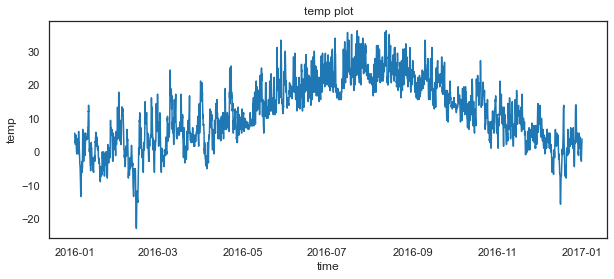

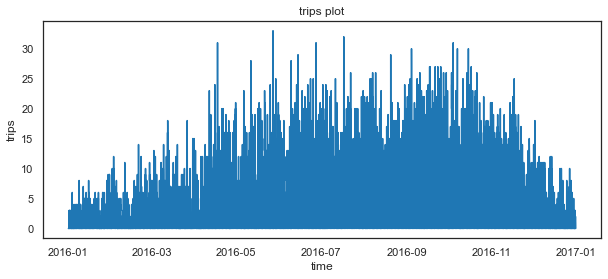

In [23]:
# average temperature visualization
fig,ax = plt.subplots(figsize=(10,4))
ax.plot(weather_data_16["date_time"],weather_data_16["avg_temp"],"-")
ax.set_xlabel("time")
ax.set_ylabel("temp")
ax.set_title("temp plot")

# trips per hours visualization
fig,ax2 = plt.subplots(figsize=(10,4))
ax2.plot(tripdata67_hourly["date_time"],tripdata67_hourly["trips_out"],"-")
ax2.set_xlabel("time")
ax2.set_ylabel("trips")
ax2.set_title("trips plot")

plt.show()

#note: probably correlation of temperature and number of outgoing trips

In [24]:
# define dependent (y) and independent (x) variables for trip demand prediction

xp = tripdata67_hourly["avg_temp"]

yp = tripdata67_hourly["trips_out"]

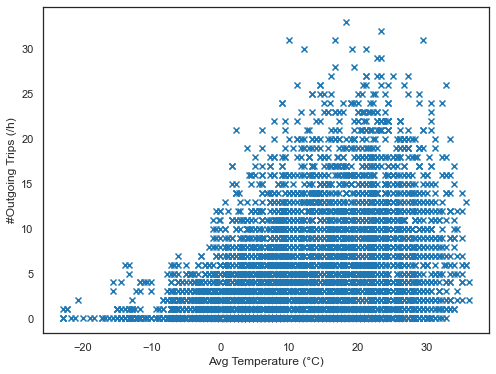

In [25]:
fig, ax = plt.subplots(figsize = (8,6))
# plotting the data
ax.scatter(xp, yp, marker='x',)
ax.set_xlabel("Avg Temperature (°C)")
ax.set_ylabel("#Outgoing Trips (/h)")

plt.show()
#saving figures (You can comment-out this line inorder not to save figures)
#plt.savefig('summer data_peak demand.pdf')
# note: we see that a higher average temperature in an hour correlates with the number of outgoing trips
# (positive trend until +25°C, then negative)

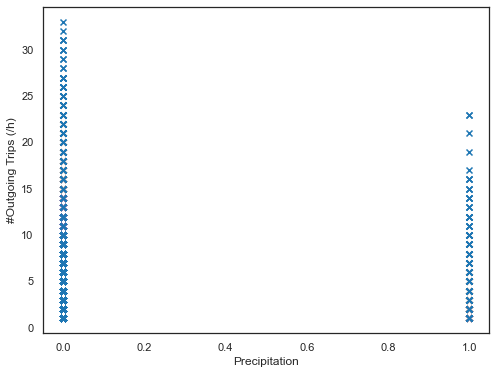

In [62]:
#UNWICHTIG
# define dependent (y) and independent (x) variables for trip demand prediction

xp = tripdata67_hourly["precip"]

yp = tripdata67_hourly["trips_out"]

#min_H_temp, max_H_temp = xp.min(), xp.max()

fig, ax = plt.subplots(figsize = (8,6))
# Plotting the data
ax.scatter(xp, yp, marker='x',)
ax.set_xlabel("Precipitation")
ax.set_ylabel("#Outgoing Trips (/h)")

plt.show()
#saving figures (You can comment-out this line inorder not to save figures)
#plt.savefig('summer data_peak demand.pdf')

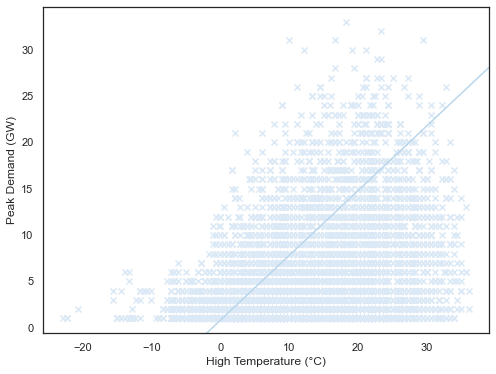

In [283]:
# UNWICHTIG
# define theta vector
theta = np.array([0.7, 0.80])

# set up plot
fig, ax = plt.subplots(figsize = (8,6))

# add objects to axis
ax.scatter(xp, yp, marker='x')
xlimp, ylimp =(plt.gca().get_xlim(), plt.gca().get_ylim())  #gets limity of x and y
ax.plot(xlimp, [theta[0]*xlimp[0]+theta[1], theta[0]*xlimp[1]+theta[1]], 'C1')
ax.set_xlim(xlimp)
ax.set_ylim(ylimp)
ax.set_xlabel("High Temperature (°C)")
ax.set_ylabel("Peak Demand (GW)")
plt.show()
#plt.savefig('summer data_peak demand_line.pdf')

In [26]:
# to plot a polynomial regression, we took the code from the workshop

# x is the input variable
# y is the output vaiable
# d is degree pf polynomial regression

def plot_regression_poly(x, y, d):
    
    # Create polynomial features
    min_x, max_x = x.min(), x.max()
    xs = 2*(x - min_x)/(max_x - min_x)-1  # standardize to range [-1,1]
    X = np.array([xs**i for i in range(d,-1,-1)]).T
    
    # Implement polynomial regression using least squares (we use the nomal equations as derived in the lecture)
    theta = np.linalg.solve(X.T @ X, X.T @ y)
    xt0 = np.linspace(min_x-1, max_x+1, 400)
    
    # create scaled test dataset
    xt = 2* (xt0 - min_x)/(max_x - min_x) -1
    Xt = np.array([xt**i for i in range(d,-1,-1)]).T
    yt = Xt @ theta
    
    # Plot results
    plt.figure(figsize = (8,6))
    plt.scatter(x, y, marker="x")
    ylim = plt.ylim()
    plt.plot(xt0, yt, 'C1')
    plt.xlabel("Temperature (°C)")
    plt.ylabel("Demand (GW)")
    plt.xlim([min_x-2, max_x+2])
    plt.ylim(ylim)
    print(theta[:7]) # prints first 3 thetas

[5.20184949 3.16462992]


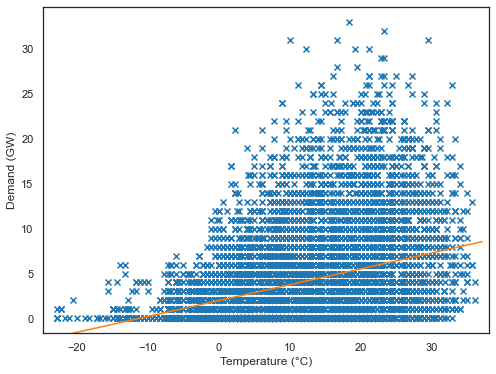

In [30]:
plot_regression_poly(x = xp, y=yp, d = 1)

[0.05836358 5.1826315  3.15975946]


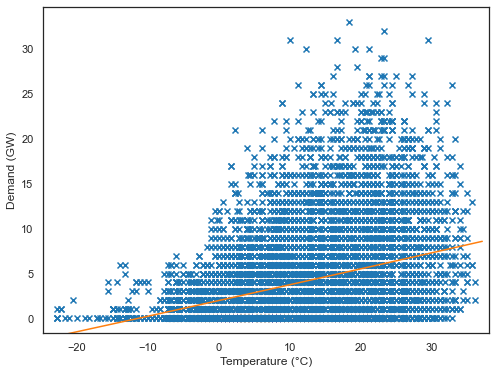

In [31]:
plot_regression_poly(x = xp, y=yp, d = 2)

[-2.4691568   0.9013659   5.76240632  3.09134447]


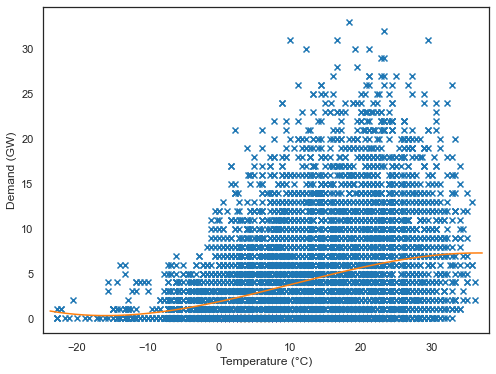

In [32]:
plot_regression_poly(x = xp, y=yp, d = 3)

[-32.63550377  -4.71398058  53.78801811   4.82321407 -26.78751996
   0.16868236   8.19837954]


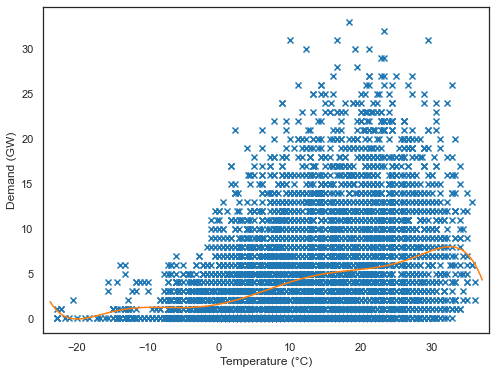

In [34]:
plot_regression_poly(x = xp, y=yp, d = 7)

#### train test split

In [35]:
# splitting the data with 70-30% split
x_train, x_test, y_train, y_test = train_test_split(tripdata67_hourly["avg_temp"], tripdata67_hourly["trips_out"], test_size=0.3, random_state=42)

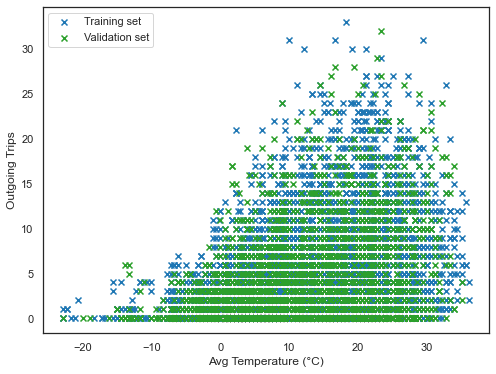

In [36]:
# plotting train and test set
plt.figure(figsize = (8,6))
plt.scatter(x_train, y_train, marker='x', color="C0")
plt.scatter(x_test, y_test, marker='x', color="C2")
plt.xlabel("Avg Temperature (°C)")
plt.ylabel("Outgoing Trips")
plt.legend(['Training set', 'Validation set'])
plt.show()
#plt.savefig('crossvalidation.pdf', dpi = 300)

In [37]:
# to determine the mean squared error, we use code from the workshop
def ls_poly(x, y, d): #ls=lest squares
    
    # Create polynomial features
    min_x, max_x = x.min(), x.max()
    xs = 2*(x - min_x)/(max_x - min_x)-1  # standardize to range [-1,1]
    X = np.array([xs**i for i in range(d,-1,-1)]).T
    
    # Implement polynomial regression using least squares (we use the nomal equations as derived in the lecture)
    theta = np.linalg.solve(X.T @ X, X.T @ y)
    
    return theta

Text(0, 0.5, 'Mean squared error')

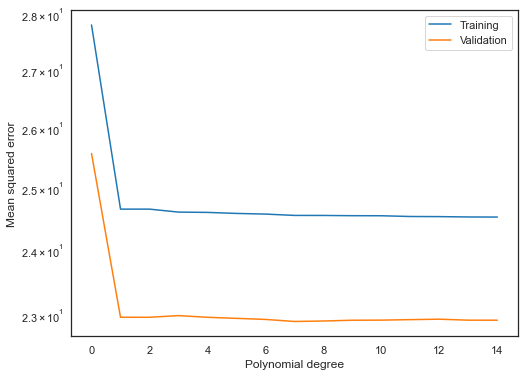

In [38]:
min_x_train, max_x_train = x_train.min(), x_train.max()
x_train = 2*(x_train - min_x_train)/(max_x_train - min_x_train) - 1
x_test = 2*(x_test - min_x_train)/(max_x_train - min_x_train) - 1

def poly_feat(x, degree):
    return np.array([x**i for i in range(degree,-1,-1)]).T
    
maxdegree = 15
    
err_train = []
err_cv = []
for i in range(maxdegree):
    theta = ls_poly(x_train, y_train, i)
    err_train.append(((poly_feat(x_train,i) @ theta - y_train)**2).mean())
    err_cv.append(((poly_feat(x_test,i) @ theta - y_test)**2).mean())

plt.figure(figsize = (8,6))
plt.semilogy(range(maxdegree), err_train, range(maxdegree), err_cv)
plt.legend(["Training", "Validation"])
plt.xlabel("Polynomial degree")
plt.ylabel("Mean squared error")

### REGULARIZATION

In [ ]:
# because we need quite large polynomial degrees to get accurate results, we decided to use regularization

In [91]:
# a polynomial degree of 35 and a value for lambda of 0.4 seem a good estimate for an accurate prediction
deg = 35
lam = 0.4

xp = tripdata67_hourly["avg_temp"].values
yp = tripdata67_hourly["trips_out"].values

# using mostly code from the workshop to use scikits ridge regression 
# initialize model
Poly = PolynomialFeatures(degree = deg)

# fit and transform xp
X_poly = Poly.fit_transform(xp.reshape(-1,1))

model_L2 = Ridge(alpha = lam, normalize = True, solver = 'lsqr') # select least squares regression as solver

model_L2.fit(X_poly, yp)
prediction = model_L2.predict(X_poly)

print("Coefficients ", model_L2.coef_, "\nIntercept ", model_L2.intercept_ )

Coefficients  [ 0.00000000e+00  8.23465635e-02  1.54808106e-03  3.22474439e-05
  4.71089281e-07  7.19432600e-09  2.47117987e-11 -1.25939553e-12
 -8.61782034e-14 -2.57983834e-15 -7.63135113e-17 -1.81218626e-18
 -4.32838145e-20 -8.89432653e-22 -1.78905152e-23 -2.98421589e-25
 -4.31456893e-27 -2.74223545e-29  7.31491589e-31  4.25685626e-32
  1.11045406e-33  1.45302807e-35 -4.72443236e-37 -4.68297448e-38
 -2.48853954e-39 -1.07867906e-40 -4.21864233e-42 -1.54523679e-43
 -5.41265213e-45 -1.83399249e-46 -6.05844988e-48 -1.96125413e-49
 -6.24562634e-51 -1.96196740e-52 -6.09286142e-54 -1.87365629e-55] 
Intercept  2.5246486152036387


In [92]:
# function for plotting

def plot_scikit_output (x, y, fitted_model):
    
    min_x, max_x = x.min(), x.max()
    xt0 = np.linspace(min_x-1, max_x+1, 400)
    
    xt0_poly = Poly.fit_transform(xt0.reshape(-1,1))
    
    # plotting routine
    plt.figure(figsize = (8,6))
    plt.scatter(x, y, marker="x")
    ylim = plt.ylim()
    plt.plot(xt0, fitted_model.predict(xt0_poly), 'C1')
    plt.xlabel("Temperature (°C)")
    plt.ylabel("Outgoing trips")
    plt.xlim([min_x-2, max_x+2])
    plt.ylim(ylim)

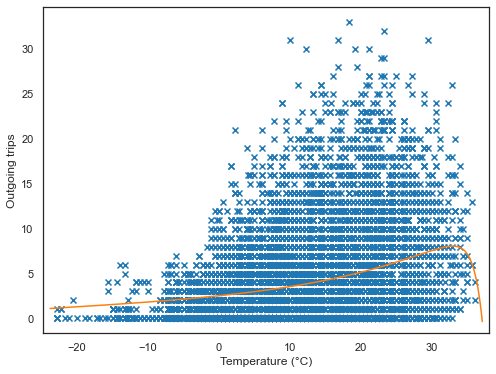

In [93]:
plot_scikit_output (xp, yp, model_L2)

# TO DO: EVALUTATION

## Radial Basis Function

In [94]:
# for the second regression algorithm we picked the Radial Basis function
# Hyperparameters


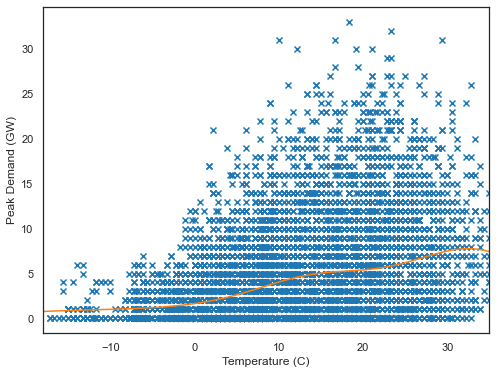

In [95]:
# using code from the workshops to realize the RBF
# create RBF features
def rbf_feat(x, mu, sig):
    return np.hstack([np.exp(-(x[:,None] - mu)**2/(2*sig**2)), np.ones((len(x),1))])

def plot_regression_rbf(theta, mu, sig):
    xt = np.linspace(-20,35, 400)
    yt = rbf_feat(xt, mu, sig) @ theta
    
    plt.figure(figsize = (8,6))
    plt.scatter(tripdata67_hourly["avg_temp"], tripdata67_hourly["trips_out"], marker="x")
    ylim = plt.ylim()
    plt.plot(xt, yt, 'C1')
    plt.xlabel("Temperature (C)")
    plt.ylabel("Outgoing trips")
    plt.xlim([-18,35])
    plt.ylim(ylim)                  

def train_rbf(x, y, n_rbf):
    min_x, max_x = x.min(), x.max()
    sig = (max_x - min_x)/(n_rbf-1)
    mu = np.linspace(min_x, max_x, n_rbf-1)
    
    Phi = rbf_feat(x, mu, sig)
    theta = np.linalg.solve(Phi.T @ Phi, Phi.T @ y)
    return theta, mu, sig
    
x = tripdata67_hourly["avg_temp"].values
plot_regression_rbf(*train_rbf(xp, yp, 10))

In [ ]:
# note: no need to use regularization to smooth the function

# TO DO: EVALUATION

In [242]:
# rescaling
x_nor = (xp-min(xp))/(max(xp)-min(xp))
y_nor = (yp-min(yp))/(max(yp)-min(yp))

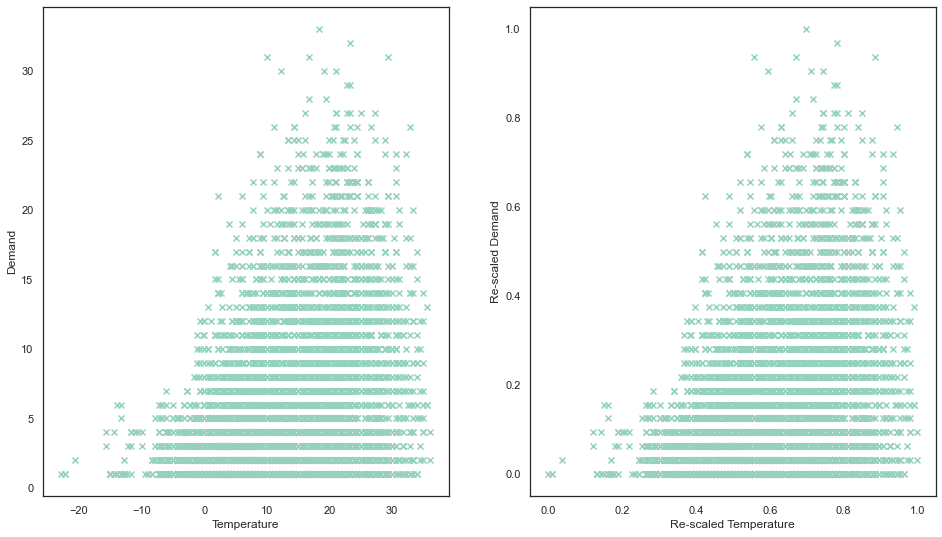

In [243]:
# set up plot
fig, axes = plt.subplots(1,2,figsize = (16,9))

axes[0].scatter(xp, yp, marker='x')
axes[0].set_xlabel("Temperature")
axes[0].set_ylabel("Demand")

axes[1].scatter(x_nor, y_nor, marker = 'x')
axes[1].set_xlabel("Re-scaled Temperature")
axes[1].set_ylabel("Re-scaled Demand")

plt.show()

In [244]:
theta = np.array([0., 0.])

alpha = 1.0

for t in range(20):
    print("Iteration {}: ".format(t), theta)
    
    # partial derivative theta1: 2*sum(((theta1*x + theta2)-y)*x)
    # term 2/N added here (usully included in alpha term), this is just a constant so could also be omitted
    theta[0] -= alpha/len(xp) * 2 * sum((theta[0] * x_nor + theta[1] - y_nor)*x_nor)
    
    # partial derivative theta2: 2*sum(((theta1*x + theta2)-y))
    # term 2/N added here (usully included in alpha term), this is just a constant so could also be omitted
    theta[1] -= alpha/len(xp) * 2 * sum((theta[0] * x_nor + theta[1] - y_nor) ) # this is the intercept with a slightly different partial derivative

Iteration 0:  [0. 0.]
Iteration 1:  [0.21071427 0.05996378]
Iteration 2:  [0.1814432  0.03559715]
Iteration 3:  [0.20501209 0.03130117]
Iteration 4:  [0.2151191 0.0233058]
Iteration 5:  [0.22693624 0.01693011]
Iteration 6:  [0.2371379  0.01089934]
Iteration 7:  [0.24658545 0.00544075]
Iteration 8:  [0.25518093 0.0004462 ]
Iteration 9:  [ 0.26303556 -0.00411143]
Iteration 10:  [ 0.27020538 -0.00827316]
Iteration 11:  [ 0.27675186 -0.01207274]
Iteration 12:  [ 0.28272879 -0.01554183]
Iteration 13:  [ 0.28818582 -0.01870914]
Iteration 14:  [ 0.29316815 -0.02160094]
Iteration 15:  [ 0.29771707 -0.02424118]
Iteration 16:  [ 0.30187029 -0.02665175]
Iteration 17:  [ 0.30566223 -0.02885263]
Iteration 18:  [ 0.30912432 -0.03086207]
Iteration 19:  [ 0.31228524 -0.0326967 ]


### SCIKITLEARN REGRESSION

[0.18768717] 3.616782170151294


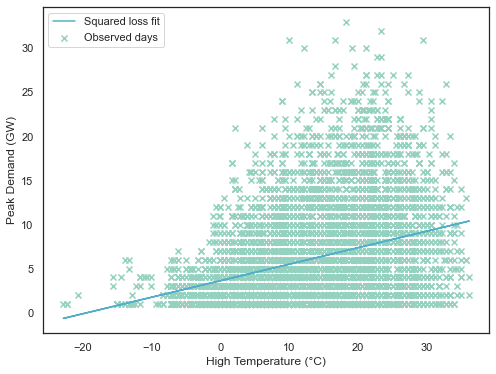

In [245]:
X = tripdata67_hourly["avg_temp"].values.reshape((-1,1)) # if we pass a 1-feature array we need to re-shape it! This is not required for multi-dimenisonal arrays
y = tripdata67_hourly["trips_out"]

# initialize model
lin_mod = LinearRegression()

#train model
lin_mod.fit(X, y)

#make predictions using model
model_pred = lin_mod.predict(X)

# plot resulzts
plt.figure(figsize = (8,6))
plt.scatter(X, y, marker="x")
plt.xlabel("High Temperature (°C)")
plt.ylabel("Peak Demand (GW)")
plt.plot(X, model_pred, c='C2')
plt.legend(['Squared loss fit','Observed days'])
print(lin_mod.coef_, lin_mod.intercept_)

# STATION DATA

In [11]:
stationdata = pd.read_csv("../current_bluebikes_stations_new.csv", encoding = "ISO-8859-1")

In [213]:
stationdata

,Number,Name,Latitude,Longitude,District,Public,Total docks,Deployment Year
0,K32015,1200 Beacon St,42.344149,-71.114674,Brookline,Yes,15,2021.0
1,W32006,160 Arsenal,42.364664,-71.175694,Watertown,Yes,11,2021.0
2,A32019,175 N Harvard St,42.363796,-71.129164,Boston,Yes,18,2014.0
3,S32035,191 Beacon St,42.380323,-71.108786,Somerville,Yes,19,2018.0
4,C32094,2 Hummingbird Lane at Olmsted Green,42.288870,-71.095003,Boston,Yes,17,2020.0
...,...,...,...,...,...,...,...,...
422,N32005,West Newton,42.349601,-71.226275,Newton,Yes,15,2020.0
423,A32043,Western Ave at Richardson St,42.361787,-71.143931,Boston,Yes,19,2019.0
424,B32059,Whittier St Health Center,42.332863,-71.092189,Boston,Yes,19,2019.0
425,D32040,Williams St at Washington St,42.306539,-71.107669,Boston,Yes,19,2018.0


In [13]:
stationdata

,Number,Name,Latitude,Longitude,District,Public,Total docks,Deployment Year
0,K32015,1200 Beacon St,42.344149,-71.114674,Brookline,Yes,15,2021.0
1,W32006,160 Arsenal,42.364664,-71.175694,Watertown,Yes,11,2021.0
2,A32019,175 N Harvard St,42.363796,-71.129164,Boston,Yes,18,2014.0
3,S32035,191 Beacon St,42.380323,-71.108786,Somerville,Yes,19,2018.0
4,C32094,2 Hummingbird Lane at Olmsted Green,42.288870,-71.095003,Boston,Yes,17,2020.0
...,...,...,...,...,...,...,...,...
422,N32005,West Newton,42.349601,-71.226275,Newton,Yes,15,2020.0
423,A32043,Western Ave at Richardson St,42.361787,-71.143931,Boston,Yes,19,2019.0
424,B32059,Whittier St Health Center,42.332863,-71.092189,Boston,Yes,19,2019.0
425,D32040,Williams St at Washington St,42.306539,-71.107669,Boston,Yes,19,2018.0


In [ ]:
----------------------------------------------------------------